# Test python script to generate TREECOOL files

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import gen_UVB as UVB

In [2]:
# compare two files
file_1='TREECOOL_z_mid_HI_6.0.txt'
z_HI_1=6.0
file_2='TREECOOL_z_mid_HI_12.0.txt'
z_HI_2=12.0
UVB.generate_treecool_file(output_file=file_1,z_mid_HI_reion=z_HI_1)
UVB.generate_treecool_file(output_file=file_2,z_mid_HI_reion=z_HI_2)

z_end for HI reionisation model (Q_HII = 1) = 4.93
z_end for HI reionisation model (Q_HII = 1) = 10.93


Text(0.5, 1.0, 'z_mid_HI_reion = 6.0 (solid), z_mid_HI_reion = 12.0 (dashed)')

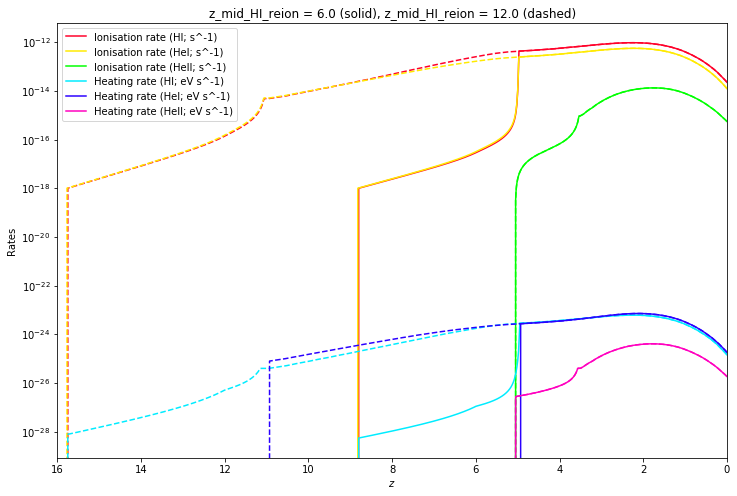

In [3]:
#Plot UVB rates
treecool_1 = np.loadtxt(file_1)
treecool_2 = np.loadtxt(file_2)

rate_labels = [r'Ionisation rate (HI; s^-1)', r'Ionisation rate (HeI; s^-1)',
               r'Ionisation rate (HeII; s^-1)', r'Heating rate (HI; eV s^-1)',
               r'Heating rate (HeI; eV s^-1)', r'Heating rate (HeII; eV s^-1)']

plt.figure(figsize=(12., 8.))
#plt.axvline(x=z_mid_HI_reion, color='gray', ls=':')
#plt.axvline(x=z_HII, color='black', ls=':')
#plt.axvline(x=z_end_HeII_reion, color='black', ls=':')

Ncol=treecool_1.shape[1]
for i in range(1, Ncol):
    line_colour = mcm.gist_rainbow((i-1) / (Ncol-2))
    plt.plot((10. ** treecool_1[:, 0]) - 1., treecool_1[:, i], color=line_colour, label=rate_labels[i-1])
    plt.plot((10. ** treecool_2[:, 0]) - 1., treecool_2[:, i], color=line_colour, ls='--')

plt.gca().invert_xaxis()
plt.yscale('log')
plt.legend()
plt.xlim([16,0])
plt.xlabel(r'$z$')
plt.ylabel(r'Rates')
plt.title(r'z_mid_HI_reion = %s (solid), z_mid_HI_reion = %s (dashed)'%(z_HI_1,z_HI_2))